In [58]:
 pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [59]:
 pip install hijri-converter

Note: you may need to restart the kernel to use updated packages.


In [60]:
from datetime import date,timedelta
from hijri_converter import convert
import holidays
date(2014, 1, 1) in holidays.US()

True

In [61]:
date(2020, 10, 4) in holidays.TR()

False

In [62]:
date(2010, 7, 15) in holidays.TR()

False

In [63]:
date(2020, 10, 5).weekday()

0

In [64]:
# zilhicce nin 10'u Kurban bayramı, 1 gün öncesi arefe günü (9 zilhicce)
# 1 şevval Ramazan bayramı ilk günü, 1 gün öncesi arefe günü
# 10 muharrem aşure günü
# Ramazan Şerif ayında mıyız?

In [65]:
h = convert.Gregorian(2020, 7, 30).to_hijri()

In [66]:
h.year, h.month, h.day, h

(1441, 12, 9, Hijri(1441, 12, 9))

In [67]:
# Girilen tarih bilgisinin Resmi tatil mi bilgisini döner. Türkiye'deki verilere göre dönüş yapar.
def is_official_holiday(date):
    return date in holidays.TR()
    

In [68]:
# Girilen tarih bilgisinin Ramazan ayı içerisinde olup olmadığı bilgisini döner.
def is_ramadan(year, month, day):
    h = convert.Gregorian(year, month, day).to_hijri()
    return h.month == 9

In [69]:
# Girilen tarih bilgisinin Ramazan Bayramı olup olmadığı bilgisini döner.
def is_ramadan_feast(year, month, day):
    h = convert.Gregorian(year, month, day).to_hijri()
    return h.month == 10 and h.day in {1,2,3}

In [70]:
# Girilen tarih bilgisinin Kurban Bayramı olup olmadığı bilgisini döner.
def is_kurban_feast(year, month, day):
    h = convert.Gregorian(year, month, day).to_hijri()
    return h.month == 12 and h.day in {10,11,12,13}

In [71]:
# Girilen tarih bilgisinin Arefe günü olup olmadığı bilgisini döner.
def is_arefe_day(year, month, day):
    day = date(year, month, day)
    day_after = day + timedelta(days=1)
    h = convert.Gregorian(day_after.year, day_after.month, day_after.day).to_hijri()
    if h.month == 12 and h.day == 10:
        return True
    elif h.month == 10 and h.day == 1:
        return True
    else:
        return False

In [72]:
# Girilen tarih bilgisinin Ramazan Bayramı öncesi Arefe günü olup olmadığı bilgisini döner.
def is_ramadan_arefe_day(year, month, day):
    day = date(year, month, day)
    day_after = day + timedelta(days=1)
    h = convert.Gregorian(day_after.year, day_after.month, day_after.day).to_hijri()
    if h.month == 10 and h.day == 1:
        return True
    else:
        return False

In [73]:
# Girilen tarih bilgisinin Kurban Bayramı öncesi Arefe günü olup olmadığı bilgisini döner.
def is_kurban_arefe_day(year, month, day):
    day = date(year, month, day)
    day_after = day + timedelta(days=1)
    h = convert.Gregorian(day_after.year, day_after.month, day_after.day).to_hijri()
    if h.month == 12 and h.day == 10:
        return True
    else:
        return False

In [74]:
def is_asura_day(year, month, day):
    h = convert.Gregorian(year, month, day).to_hijri()
    return h.month == 1 and h.day == 10

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",100)
%matplotlib inline

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
#import Data
df = pd.read_excel('dataset.xlsx')

In [78]:
df.head()

,Date,sto_kod,SIPARIS_TIPI,dep_no,dep_adi,GUN_BASI_MEVCUT,DEPOLARDAN_SEVKIYAT,MAGAZALARDAN_TRANSFER,FIRMADAN_GELEN,SATIS_IADE,VIRMAN_GIRISI,HAVUZ_DEPODAN_TRANSFER,PERAKENDE_SATIS,TOPTAN_SATIS,DEPOLARA_IADE,MAGAZALARA_TRANSFER,FIRMAYA_IADE,VIRMAN_CIKISI,SARF_CIKISI,FIRE_CIKISI,GUN_SONU_MEVCUT,MALIYET,PROMOSYON,SATIS_FIYATI
0,2018-01-01,111824,Depo,60,ALANYA ŞUBE,124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,24.54,0,29.95
1,2018-01-01,111824,Depo,2,ÇENGELKÖY ŞUBE,47,0,0,0,0,0,0,-6,0,0,0,0,0,0,0,41,24.54,0,29.95
2,2018-01-01,111824,Depo,3,ŞERİFALİ ŞUBE,49,0,0,0,0,0,0,-3,0,0,0,0,0,0,0,46,24.54,0,29.95
3,2018-01-01,111824,Depo,4,GÖZTEPE ŞUBE,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,24.54,0,29.95
4,2018-01-01,111824,Depo,6,KASIMPAŞA ŞUBE,18,0,0,0,0,0,0,-4,0,0,0,0,0,0,0,14,24.54,0,29.95


In [79]:
df = df[df.dep_adi == "KASIMPAŞA ŞUBE"]

In [80]:
df = df[( (df.GUN_SONU_MEVCUT > 0) & ( df.GUN_BASI_MEVCUT > 0))] 
# gün sonu mevcut sıfır ise, satılan ürünün stoğu tükenmesinden kaynaklı gün içerisindeki satış adedi,
# gerçekte satabileceği değeri yansıtmayacaktır, modelimiz için doğru bir kaynak olmayacaktır

In [81]:
df['is_official_holiday'] = df.Date.apply(lambda x: is_official_holiday(x))

In [82]:
df['is_ramadan'] = df.Date.apply(lambda x: is_ramadan(x.year, x.month, x.day))

In [83]:
df['is_ramadan_feast'] = df.Date.apply(lambda x: is_ramadan_feast(x.year, x.month, x.day))

In [84]:
df['is_kurban_feast'] = df.Date.apply(lambda x: is_kurban_feast(x.year, x.month, x.day))

In [85]:
# df['is_arefe_day'] = df.Date.apply(lambda x: is_arefe_day(x.year, x.month, x.day))

In [86]:
df['is_ramadan_arefe_day'] = df.Date.apply(lambda x: is_ramadan_arefe_day(x.year, x.month, x.day))

In [87]:
df['is_kurban_arefe_day'] = df.Date.apply(lambda x: is_kurban_arefe_day(x.year, x.month, x.day))

In [88]:
df['is_asura_day'] = df.Date.apply(lambda x: is_asura_day(x.year, x.month, x.day))

In [89]:
df['kar_marji'] = (df.SATIS_FIYATI - df.MALIYET) / df.SATIS_FIYATI * 100

In [90]:
df.head()

,Date,sto_kod,SIPARIS_TIPI,dep_no,dep_adi,GUN_BASI_MEVCUT,DEPOLARDAN_SEVKIYAT,MAGAZALARDAN_TRANSFER,FIRMADAN_GELEN,SATIS_IADE,VIRMAN_GIRISI,HAVUZ_DEPODAN_TRANSFER,PERAKENDE_SATIS,TOPTAN_SATIS,DEPOLARA_IADE,MAGAZALARA_TRANSFER,FIRMAYA_IADE,VIRMAN_CIKISI,SARF_CIKISI,FIRE_CIKISI,GUN_SONU_MEVCUT,MALIYET,PROMOSYON,SATIS_FIYATI,is_official_holiday,is_ramadan,is_ramadan_feast,is_kurban_feast,is_ramadan_arefe_day,is_kurban_arefe_day,is_asura_day,kar_marji
4,2018-01-01,111824,Depo,6,KASIMPAŞA ŞUBE,18,0,0,0,0,0,0,-4,0,0,0,0,0,0,0,14,24.54,0,29.95,True,False,False,False,False,False,False,18.063439
14,2018-01-02,111824,Depo,6,KASIMPAŞA ŞUBE,14,0,0,0,0,0,0,-7,0,0,0,0,0,0,0,7,24.54,0,29.95,False,False,False,False,False,False,False,18.063439
24,2018-01-03,111824,Depo,6,KASIMPAŞA ŞUBE,7,0,0,0,0,0,0,-6,0,0,0,0,0,0,0,1,24.54,0,29.95,False,False,False,False,False,False,False,18.063439
94,2018-01-10,111824,Depo,6,KASIMPAŞA ŞUBE,60,0,0,0,0,0,0,-4,0,0,0,0,0,0,0,56,24.54,0,29.95,False,False,False,False,False,False,False,18.063439
104,2018-01-11,111824,Depo,6,KASIMPAŞA ŞUBE,56,0,0,0,0,0,0,-5,0,0,0,0,0,0,0,51,24.54,0,29.95,False,False,False,False,False,False,False,18.063439


<AxesSubplot:>

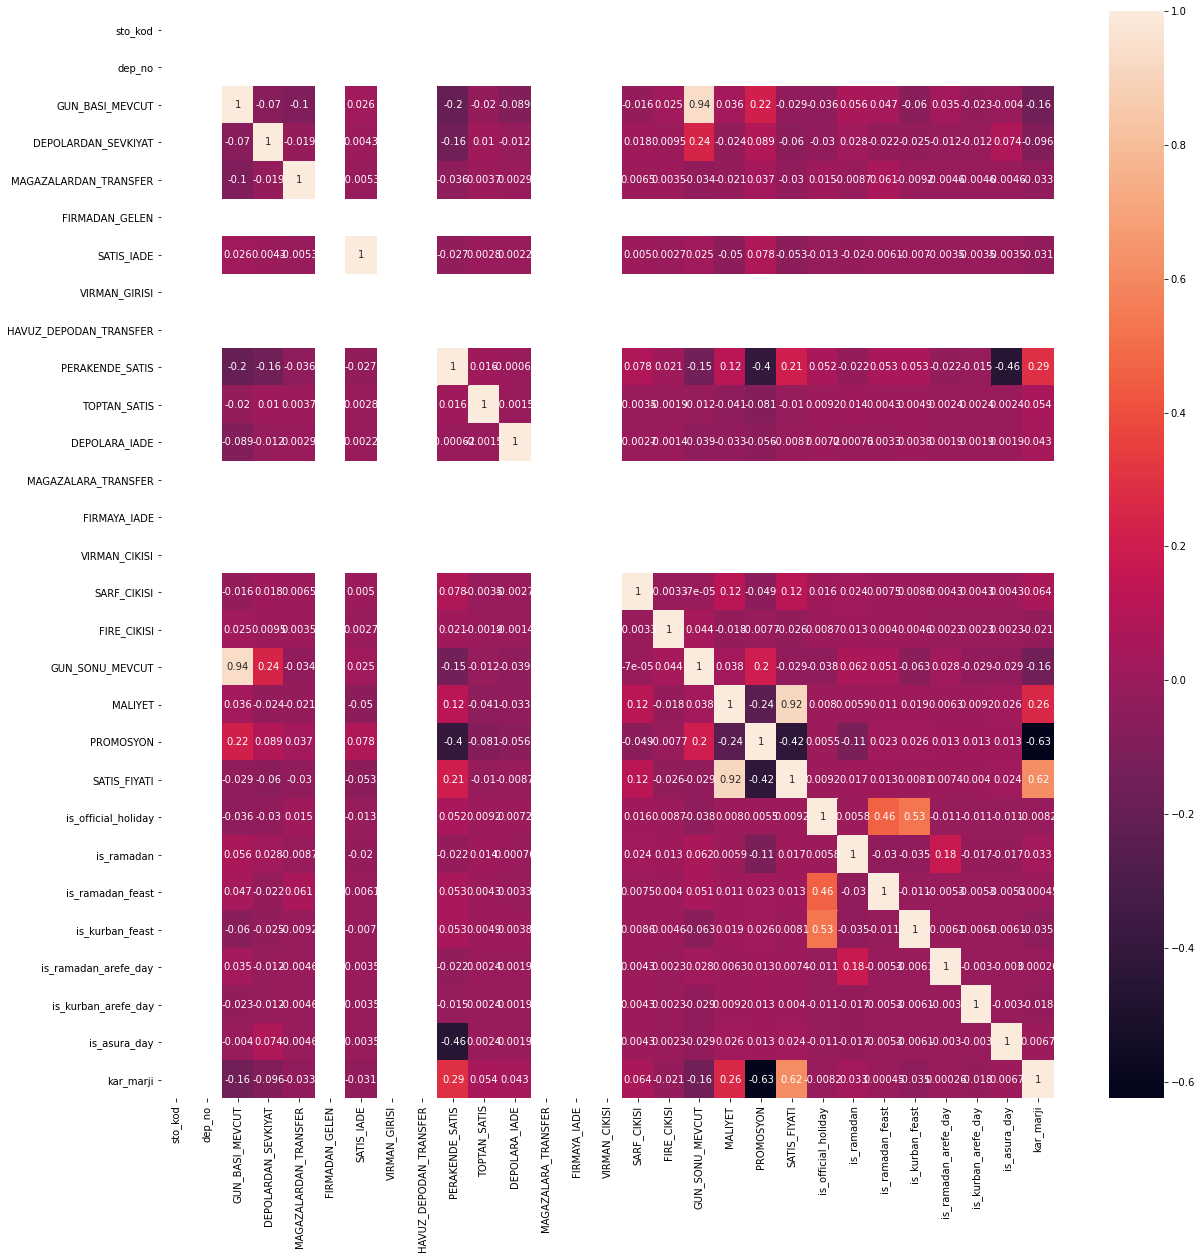

In [91]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,20))   #20*20 kare şeklinde getirdik
sns.heatmap(df.corr(), annot = True)

In [92]:
df['TOPLAM_SATIS'] = (df['PERAKENDE_SATIS'] + df['TOPTAN_SATIS']) * (-1)

In [93]:
df.drop('PERAKENDE_SATIS', axis='columns', inplace=True)
df.drop('TOPTAN_SATIS', axis='columns', inplace=True)

In [94]:
df.head()

,Date,sto_kod,SIPARIS_TIPI,dep_no,dep_adi,GUN_BASI_MEVCUT,DEPOLARDAN_SEVKIYAT,MAGAZALARDAN_TRANSFER,FIRMADAN_GELEN,SATIS_IADE,VIRMAN_GIRISI,HAVUZ_DEPODAN_TRANSFER,DEPOLARA_IADE,MAGAZALARA_TRANSFER,FIRMAYA_IADE,VIRMAN_CIKISI,SARF_CIKISI,FIRE_CIKISI,GUN_SONU_MEVCUT,MALIYET,PROMOSYON,SATIS_FIYATI,is_official_holiday,is_ramadan,is_ramadan_feast,is_kurban_feast,is_ramadan_arefe_day,is_kurban_arefe_day,is_asura_day,kar_marji,TOPLAM_SATIS
4,2018-01-01,111824,Depo,6,KASIMPAŞA ŞUBE,18,0,0,0,0,0,0,0,0,0,0,0,0,14,24.54,0,29.95,True,False,False,False,False,False,False,18.063439,4
14,2018-01-02,111824,Depo,6,KASIMPAŞA ŞUBE,14,0,0,0,0,0,0,0,0,0,0,0,0,7,24.54,0,29.95,False,False,False,False,False,False,False,18.063439,7
24,2018-01-03,111824,Depo,6,KASIMPAŞA ŞUBE,7,0,0,0,0,0,0,0,0,0,0,0,0,1,24.54,0,29.95,False,False,False,False,False,False,False,18.063439,6
94,2018-01-10,111824,Depo,6,KASIMPAŞA ŞUBE,60,0,0,0,0,0,0,0,0,0,0,0,0,56,24.54,0,29.95,False,False,False,False,False,False,False,18.063439,4
104,2018-01-11,111824,Depo,6,KASIMPAŞA ŞUBE,56,0,0,0,0,0,0,0,0,0,0,0,0,51,24.54,0,29.95,False,False,False,False,False,False,False,18.063439,5


In [95]:
df['GECEN_HAFTA_ORTALAMA'] = df.iloc[:,30].rolling(window=7).mean()

In [96]:
df['GECEN_AY_ORTALAMA'] = df.iloc[:,30].rolling(window=30).mean()

In [97]:
df['UC_GUNLUK_ORTALAMA'] = df.iloc[:,30].rolling(window=3).mean()

In [98]:
df.tail()

,Date,sto_kod,SIPARIS_TIPI,dep_no,dep_adi,GUN_BASI_MEVCUT,DEPOLARDAN_SEVKIYAT,MAGAZALARDAN_TRANSFER,FIRMADAN_GELEN,SATIS_IADE,VIRMAN_GIRISI,HAVUZ_DEPODAN_TRANSFER,DEPOLARA_IADE,MAGAZALARA_TRANSFER,FIRMAYA_IADE,VIRMAN_CIKISI,SARF_CIKISI,FIRE_CIKISI,GUN_SONU_MEVCUT,MALIYET,PROMOSYON,SATIS_FIYATI,is_official_holiday,is_ramadan,is_ramadan_feast,is_kurban_feast,is_ramadan_arefe_day,is_kurban_arefe_day,is_asura_day,kar_marji,TOPLAM_SATIS,GECEN_HAFTA_ORTALAMA,GECEN_AY_ORTALAMA,UC_GUNLUK_ORTALAMA
9944,2020-09-21,111824,Firma,6,KASIMPAŞA ŞUBE,39,0,0,0,0,0,0,0,0,0,0,0,0,38,35.195551,0,53.75,False,False,False,False,False,False,False,34.519906,1,1.857143,1.933333,2.333333
9954,2020-09-22,111824,Firma,6,KASIMPAŞA ŞUBE,38,0,0,0,0,0,0,0,0,0,0,0,0,37,35.195551,0,53.75,False,False,False,False,False,False,False,34.519906,1,1.714286,1.933333,1.666667
9964,2020-09-23,111824,Firma,6,KASIMPAŞA ŞUBE,37,0,0,0,0,0,0,0,0,0,0,0,0,37,35.195551,0,53.75,False,False,False,False,False,False,False,34.519906,0,1.714286,1.866667,0.666667
9974,2020-09-24,111824,Firma,6,KASIMPAŞA ŞUBE,37,0,0,0,0,0,0,0,0,0,0,0,0,37,35.195551,0,53.75,False,False,False,False,False,False,False,34.519906,0,1.714286,1.800000,0.333333
9984,2020-09-25,111824,Firma,6,KASIMPAŞA ŞUBE,37,0,0,0,0,0,0,0,0,0,0,0,0,37,35.195551,0,53.75,False,False,False,False,False,False,False,34.519906,0,1.142857,1.766667,0.000000


In [99]:
pd.get_dummies(df).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 4 to 9984
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    993 non-null    datetime64[ns]
 1   sto_kod                 993 non-null    int64         
 2   dep_no                  993 non-null    int64         
 3   GUN_BASI_MEVCUT         993 non-null    int64         
 4   DEPOLARDAN_SEVKIYAT     993 non-null    int64         
 5   MAGAZALARDAN_TRANSFER   993 non-null    int64         
 6   FIRMADAN_GELEN          993 non-null    int64         
 7   SATIS_IADE              993 non-null    int64         
 8   VIRMAN_GIRISI           993 non-null    int64         
 9   HAVUZ_DEPODAN_TRANSFER  993 non-null    int64         
 10  DEPOLARA_IADE           993 non-null    int64         
 11  MAGAZALARA_TRANSFER     993 non-null    int64         
 12  FIRMAYA_IADE            993 non-null    int64    

In [100]:
abs(pd.get_dummies(df, drop_first=True).corr()['TOPLAM_SATIS']).sort_values(ascending=False)

TOPLAM_SATIS              1.000000
UC_GUNLUK_ORTALAMA        0.716943
GECEN_HAFTA_ORTALAMA      0.530755
is_asura_day              0.459131
PROMOSYON                 0.401071
GECEN_AY_ORTALAMA         0.315919
kar_marji                 0.294943
SATIS_FIYATI              0.211854
GUN_BASI_MEVCUT           0.200108
SIPARIS_TIPI_Firma        0.180486
DEPOLARDAN_SEVKIYAT       0.157656
GUN_SONU_MEVCUT           0.146975
MALIYET                   0.122381
SARF_CIKISI               0.077655
is_kurban_feast           0.053297
is_ramadan_feast          0.053224
is_official_holiday       0.052024
MAGAZALARDAN_TRANSFER     0.036180
SATIS_IADE                0.027265
is_ramadan_arefe_day      0.021957
is_ramadan                0.021156
FIRE_CIKISI               0.020470
is_kurban_arefe_day       0.015382
DEPOLARA_IADE             0.000660
sto_kod                        NaN
dep_no                         NaN
FIRMADAN_GELEN                 NaN
VIRMAN_GIRISI                  NaN
HAVUZ_DEPODAN_TRANSF

In [101]:
X = pd.get_dummies(df, drop_first=True)

In [102]:
X

,Date,sto_kod,dep_no,GUN_BASI_MEVCUT,DEPOLARDAN_SEVKIYAT,MAGAZALARDAN_TRANSFER,FIRMADAN_GELEN,SATIS_IADE,VIRMAN_GIRISI,HAVUZ_DEPODAN_TRANSFER,DEPOLARA_IADE,MAGAZALARA_TRANSFER,FIRMAYA_IADE,VIRMAN_CIKISI,SARF_CIKISI,FIRE_CIKISI,GUN_SONU_MEVCUT,MALIYET,PROMOSYON,SATIS_FIYATI,is_official_holiday,is_ramadan,is_ramadan_feast,is_kurban_feast,is_ramadan_arefe_day,is_kurban_arefe_day,is_asura_day,kar_marji,TOPLAM_SATIS,GECEN_HAFTA_ORTALAMA,GECEN_AY_ORTALAMA,UC_GUNLUK_ORTALAMA,SIPARIS_TIPI_Firma
4,2018-01-01,111824,6,18,0,0,0,0,0,0,0,0,0,0,0,0,14,24.540000,0,29.95,True,False,False,False,False,False,False,18.063439,4,NaN,NaN,NaN,0
14,2018-01-02,111824,6,14,0,0,0,0,0,0,0,0,0,0,0,0,7,24.540000,0,29.95,False,False,False,False,False,False,False,18.063439,7,NaN,NaN,NaN,0
24,2018-01-03,111824,6,7,0,0,0,0,0,0,0,0,0,0,0,0,1,24.540000,0,29.95,False,False,False,False,False,False,False,18.063439,6,NaN,NaN,5.666667,0
94,2018-01-10,111824,6,60,0,0,0,0,0,0,0,0,0,0,0,0,56,24.540000,0,29.95,False,False,False,False,False,False,False,18.063439,4,NaN,NaN,5.666667,0
104,2018-01-11,111824,6,56,0,0,0,0,0,0,0,0,0,0,0,0,51,24.540000,0,29.95,False,False,False,False,False,False,False,18.063439,5,NaN,NaN,5.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,2020-09-21,111824,6,39,0,0,0,0,0,0,0,0,0,0,0,0,38,35.195551,0,53.75,False,False,False,False,False,False,False,34.519906,1,1.857143,1.933333,2.333333,1
9954,2020-09-22,111824,6,38,0,0,0,0,0,0,0,0,0,0,0,0,37,35.195551,0,53.75,False,False,False,False,False,False,False,34.519906,1,1.714286,1.933333,1.666667,1
9964,2020-09-23,111824,6,37,0,0,0,0,0,0,0,0,0,0,0,0,37,35.195551,0,53.75,False,False,False,False,False,False,False,34.519906,0,1.714286,1.866667,0.666667,1
9974,2020-09-24,111824,6,37,0,0,0,0,0,0,0,0,0,0,0,0,37,35.195551,0,53.75,False,False,False,False,False,False,False,34.519906,0,1.714286,1.800000,0.333333,1


In [103]:
X = X[{'TOPLAM_SATIS', 'UC_GUNLUK_ORTALAMA', 'GECEN_HAFTA_ORTALAMA', 'is_asura_day', 'PROMOSYON', 'GECEN_AY_ORTALAMA', 'kar_marji', 'SATIS_FIYATI', 'MALIYET'}]

In [104]:
X = X.dropna()

In [105]:
X.head()

,kar_marji,TOPLAM_SATIS,SATIS_FIYATI,MALIYET,GECEN_AY_ORTALAMA,is_asura_day,PROMOSYON,GECEN_HAFTA_ORTALAMA,UC_GUNLUK_ORTALAMA
354,16.225142,5,29.95,25.09057,5.300000,False,0,5.714286,5.666667
364,16.225142,3,29.95,25.09057,5.266667,False,0,6.000000,3.666667
374,16.225142,9,29.95,25.09057,5.333333,False,0,6.714286,5.666667
384,16.225142,3,29.95,25.09057,5.233333,False,0,5.857143,5.000000
394,16.225142,2,29.95,25.09057,5.166667,False,0,4.857143,4.666667


In [106]:
a = X
y = X['TOPLAM_SATIS']
del a['TOPLAM_SATIS']

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(a, y, test_size = 0.2, random_state = 13)

In [107]:
lr = LinearRegression()
regmodel = lr.fit(x_train, y_train)
y_pretest = lr.predict(x_test)
(mean_squared_error(y_test, y_pretest))**0.5, r2_score(y_test, y_pretest)

(3.4689736652466174, 0.4889603004235288)

In [108]:
from sklearn.linear_model import Ridge, Lasso
R = Ridge()
R.fit(x_train, y_train)
y_pred_ridge = R.predict(x_test)
(mean_squared_error(y_test, y_pred_ridge))**0.5, r2_score(y_test, y_pred_ridge)

(3.4690767159352855, 0.4889299376821109)

In [109]:
L = Lasso()
L.fit(x_train, y_train)
y_pred_lasso = L.predict(x_test)
(mean_squared_error(y_test, y_pred_lasso))**0.5, r2_score(y_test, y_pred_lasso)

(3.44864459577046, 0.4949323956750823)

In [110]:
from sklearn.linear_model import ElasticNet
E = ElasticNet(l1_ratio = .8)
E.fit(x_train, y_train)
y_pred_elastic = E.predict(x_test)
(mean_squared_error(y_test, y_pred_elastic))**0.5, r2_score(y_test, y_pred_elastic)

(3.447740538393819, 0.49519716650365786)

In [111]:
from sklearn.tree import ExtraTreeRegressor
ETR = ExtraTreeRegressor()
ETR.fit(x_train, y_train)
y_pred_etr = ETR.predict(x_test)
(mean_squared_error(y_test, y_pred_etr))**0.5, r2_score(y_test, y_pred_etr)

(5.065887132105606, -0.08984228035652797)

In [112]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)
y_pred_gbr = GBR.predict(x_test)
(mean_squared_error(y_test, y_pred_gbr))**0.5, r2_score(y_test, y_pred_gbr)

(3.8911329712002467, 0.3570091724360328)

In [113]:
from xgboost import XGBRegressor
XGBC = XGBRegressor()
XGBC.fit(x_train, y_train)
y_pred_xgb = XGBC.predict(x_test)
(mean_squared_error(y_test, y_pred_xgb))**0.5, r2_score(y_test, y_pred_xgb)

(4.46824385238538, 0.1521356667342878)